In [14]:
# Imports e instalações

import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install scikit-learn
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Métricas
from sklearn.metrics import (accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report, f1_score)
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

In [15]:
# Carregando o DF

# df recebe o dataset
df = pd.read_excel(r'C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados\australia_clima_v9.xlsx') #, sep=',')
df

,data,localidade,temp_min,temp_max,chuva_mm,evaporacao,horas_sol,vento_rajada_direcao_graus,vento_rajada_direcao,vento_rajada_velocidade,...,evento_enso,mes_sin,mes_cos,emissoes_co2,estacao_num,estacao,altitude,distancia_costa,ponto_orvalho_15h,depressao_orvalho_15h
0,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,315.0,NW,30,...,la_nina,-5.000000e-01,0.866025,630.7811,3,primavera,575,110,9.4,14.2
1,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,67.5,ENE,39,...,la_nina,-5.000000e-01,0.866025,630.7811,3,primavera,575,110,12.9,12.8
2,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,315.0,NW,85,...,la_nina,-5.000000e-01,0.866025,630.7811,3,primavera,575,110,14.0,6.2
3,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,315.0,NW,54,...,la_nina,-5.000000e-01,0.866025,630.7811,3,primavera,575,110,5.3,8.8
4,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,157.5,SSE,50,...,la_nina,-5.000000e-01,0.866025,630.7811,3,primavera,575,110,5.2,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50154,2017-06-25,Perth,4.9,16.8,0.0,1.6,7.9,90.0,E,39,...,neutro,1.224647e-16,-1.000000,536.7209,2,inverno,31,0,5.0,11.2
50155,2017-06-25,Melbourne,8.6,14.3,0.0,2.8,3.8,315.0,NW,35,...,neutro,1.224647e-16,-1.000000,536.7209,2,inverno,31,0,4.6,8.8
50156,2017-06-25,Melbourne,5.5,13.9,0.0,2.8,3.8,337.5,NNW,44,...,neutro,1.224647e-16,-1.000000,536.7209,2,inverno,31,0,3.8,8.4
50157,2017-06-25,Sydney,6.8,19.5,0.0,3.4,9.4,247.5,WSW,46,...,neutro,1.224647e-16,-1.000000,536.7209,2,inverno,39,0,6.3,11.6


In [16]:
df.shape

(50159, 54)

In [17]:
df.columns.to_list()

['data',
 'localidade',
 'temp_min',
 'temp_max',
 'chuva_mm',
 'evaporacao',
 'horas_sol',
 'vento_rajada_direcao_graus',
 'vento_rajada_direcao',
 'vento_rajada_velocidade',
 'vento_direcao_9h_graus',
 'vento_direcao_9h',
 'vento_direcao_15h_graus',
 'vento_direcao_15h',
 'vento_veloc_9h',
 'vento_veloc_15h',
 'umidade_9h',
 'umidade_15h',
 'pressao_9h',
 'pressao_15h',
 'nuvem_9h',
 'nuvem_15h',
 'temp_9h',
 'temp_15h',
 'chove_amanha_vtr',
 'ano',
 'mes',
 'dia',
 'trimestre_quarter',
 'horas_sol_isna',
 'evaporacao_isna',
 'nuvem_9h_isna',
 'nuvem_15h_isna',
 'pressao_9h_isna',
 'pressao_15h_isna',
 'choveu_hoje',
 'amplitude_termica',
 'umidade_media',
 'variacao_pressao',
 'latitude',
 'longitude',
 'indice_total_enso',
 'anomalia_enso',
 'evento_enso_num',
 'evento_enso',
 'mes_sin',
 'mes_cos',
 'emissoes_co2',
 'estacao_num',
 'estacao',
 'altitude',
 'distancia_costa',
 'ponto_orvalho_15h',
 'depressao_orvalho_15h']

In [18]:
target_col = "chove_amanha_vtr"

In [19]:
# Mostrando distribuicao do target via percentual com normalize=true
print(df[target_col].value_counts(dropna=False))
print(df[target_col].value_counts(normalize=True, dropna=False))

chove_amanha_vtr
0    39438
1    10721
Name: count, dtype: int64
chove_amanha_vtr
0    0.78626
1    0.21374
Name: proportion, dtype: float64


In [20]:
date_col = 'data'

# Converte a coluna de data para datetime
# - errors='coerce' força valores ruins virarem NaT (nulo datetime)
df[date_col] = pd.to_datetime(df[date_col], errors="coerce")

In [21]:
# Remove linhas onde a data não conseguiu ser convertida
# - isso evita bagunça no split temporal
df = df.dropna(subset=[date_col]).copy()

In [22]:
# Ordena o dataset por data (passado -> futuro)
# - isso é obrigatório para split temporal honesto
df = df.sort_values(by=date_col).reset_index(drop=True)

In [23]:
# Confere rapidamente a menor e a maior data (sanidade)
print("Data mínima:", df[date_col].min())
print("Data máxima:", df[date_col].max())
print("Shape após tratamento da data:", df.shape)

Data mínima: 2007-11-01 00:00:00
Data máxima: 2017-06-25 00:00:00
Shape após tratamento da data: (50159, 54)


In [24]:
# Lista de possíveis colunas que vazam o alvo (exemplos)
# - você deve ajustar conforme o seu df.columns
possible_leak_cols = [
    "chuva_amanha_mm",
    "rain_tomorrow_mm",
    "target",
    "label"
]

# Mantém somente as colunas de vazamento que realmente existem no df
leak_cols = [c for c in possible_leak_cols if c in df.columns]

# Mostra quais serão removidas (se houver)
print("Colunas removidas por possível vazamento:", leak_cols)

# Remove as colunas de vazamento do dataset (se existirem)
if len(leak_cols) > 0:
    df = df.drop(columns=leak_cols).copy()

Colunas removidas por possível vazamento: []


In [25]:
def time_split_por_localizacao(df, target_col, date_col, location_col, test_size=0.2):
    train_pieces = []
    test_pieces = []
    
    print(f"split tempo localidade ({location_col})...")
    
    # para cada cidade no dataset
    for location, group in df.groupby(location_col):
        # garante ordem temporal
        group = group.sort_values(date_col)
        
        # 2. Calcula o ponto de corte para a cidade
        n_total = len(group)
        n_test = int(n_total * test_size)
        split_idx = n_total - n_test
        
        # 3. Fatia sem misturar futuro com passado
        train_piece = group.iloc[:split_idx]
        test_piece = group.iloc[split_idx:]
        
        train_pieces.append(train_piece)
        test_pieces.append(test_piece)
        
    # reconstrói DF'S
    df_train = pd.concat(train_pieces).reset_index(drop=True)
    df_test = pd.concat(test_pieces).reset_index(drop=True)
    
    print(f"result split. treino: {len(df_train)} | teste: {len(df_test)}")
    
    # separa X e y
    y_train = df_train[target_col].astype(int)
    X_train = df_train.drop(columns=[target_col, date_col])
    
    y_test = df_test[target_col].astype(int)
    X_test = df_test.drop(columns=[target_col, date_col])
    
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = time_split_por_localizacao(
    df, 
    target_col='chove_amanha_vtr',  # target
    date_col='data',            # data
    location_col='localidade',  # cidades
    test_size=0.2
)


print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)

# Ttestando com canberra
if 'localidade' in X_test.columns:
    n_canberra = X_test['localidade'].value_counts().get('Canberra', 0)
    print(f"registros de canberra no teste: {n_canberra}")

split tempo localidade (localidade)...
result split. treino: 40136 | teste: 10023
X_train shape: (40136, 52)
X_test shape : (10023, 52)
registros de canberra no teste: 218


In [26]:
# IDENTIFICAR COLUNAS NUMÉRICAS E CATEGÓRICAS


# Detecta colunas numéricas automaticamente
numeric_features = X_train.select_dtypes(include=["number"]).columns.tolist()

# Detecta colunas categóricas automaticamente (texto/objeto/categoria)
categorical_features = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numéricas:", len(numeric_features), numeric_features[:10])
print("Categóricas:", len(categorical_features), categorical_features[:10])

Numéricas: 40 ['temp_min', 'temp_max', 'chuva_mm', 'evaporacao', 'horas_sol', 'vento_rajada_direcao_graus', 'vento_rajada_velocidade', 'vento_direcao_9h_graus', 'vento_direcao_15h_graus', 'vento_veloc_9h']
Categóricas: 6 ['localidade', 'vento_rajada_direcao', 'vento_direcao_9h', 'vento_direcao_15h', 'evento_enso', 'estacao']


In [27]:

# PIPELINE DE PREPROCESSAMENTO (NUM + CAT)


# Pipeline para colunas numéricas
# - imputer median: preenche NaN com a mediana
# - scaler: padroniza para ajudar modelos lineares
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Pipeline para colunas categóricas
# - imputer most_frequent: preenche NaN com o valor mais comum (ex.: cidade mais frequente)
# - onehot: transforma cidades em colunas 0/1 (uma por cidade)
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Junta os dois pipelines em um ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"
)


In [28]:

#  BASELINE (SEM OVERSAMPLING)


baseline_model = LogisticRegression(max_iter=2000)

baseline_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", baseline_model)
])

baseline_pipe.fit(X_train, y_train)

y_pred = baseline_pipe.predict(X_test)

print("\nClassification report (baseline):")
print(classification_report(y_test, y_pred, digits=4))

print("Matriz de confusão (baseline):")
print(confusion_matrix(y_test, y_pred))



Classification report (baseline):
              precision    recall  f1-score   support

           0     0.8849    0.9403    0.9118      7942
           1     0.7008    0.5334    0.6057      2081

    accuracy                         0.8558     10023
   macro avg     0.7928    0.7369    0.7588     10023
weighted avg     0.8467    0.8558    0.8482     10023

Matriz de confusão (baseline):
[[7468  474]
 [ 971 1110]]


In [29]:
#!pip install imblearn

In [30]:

#  OVERSAMPLING COM SMOTE (APENAS NO TREINO)


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

smote = SMOTE(
    sampling_strategy=0.5,  # minoria vira 50% da maioria
    k_neighbors=5,
    random_state=42
)

model = LogisticRegression(max_iter=2000)

smote_pipe = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", smote),
    ("model", model)
])

smote_pipe.fit(X_train, y_train)

y_pred_smote = smote_pipe.predict(X_test)

print("\nClassification report (SMOTE):")
print(classification_report(y_test, y_pred_smote, digits=4))

print("Matriz de confusão (SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))



Classification report (SMOTE):
              precision    recall  f1-score   support

           0     0.9126    0.8912    0.9018      7942
           1     0.6189    0.6742    0.6454      2081

    accuracy                         0.8462     10023
   macro avg     0.7657    0.7827    0.7736     10023
weighted avg     0.8516    0.8462    0.8485     10023

Matriz de confusão (SMOTE):
[[7078  864]
 [ 678 1403]]


In [31]:

# PROBABILIDADES DO MODELO COM SMOTE


# Probabilidade da classe 1 (chuva)
y_proba_smote = smote_pipe.predict_proba(X_test)[:, 1]

# Sanidade: ver algumas probabilidades
print("Exemplo de probabilidades:", y_proba_smote[:10])


Exemplo de probabilidades: [0.27448632 0.15898025 0.24307827 0.05033426 0.05703186 0.00446553
 0.10647474 0.32100463 0.05465845 0.31979232]


In [32]:

# DEFINIÇÃO DA GRADE DE THRESHOLDS


# Grade de thresholds para teste
thresholds = np.arange(0.30, 0.71, 0.05)

print("Thresholds testados:", thresholds)


Thresholds testados: [0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7 ]


In [33]:

# 9.3) AVALIAÇÃO POR THRESHOLD


results = []

for thr in thresholds:

    # Converte probabilidade em classe usando o threshold
    y_pred_thr = (y_proba_smote >= thr).astype(int)

    # Acurácia geral (todas as classes)
    accuracy = accuracy_score(y_test, y_pred_thr)

    # Métricas focadas na classe 1 (chuva)
    recall_1 = recall_score(y_test, y_pred_thr, pos_label=1)
    precision_1 = precision_score(y_test, y_pred_thr, pos_label=1)
    f1_1 = f1_score(y_test, y_pred_thr, pos_label=1)

    # Matriz de confusão para extrair FP e FN
    cm = confusion_matrix(y_test, y_pred_thr)
    TN, FP, FN, TP = cm.ravel()

    results.append({
        "threshold": thr,
        "accuracy": accuracy,
        "recall_chuva": recall_1,
        "precision_chuva": precision_1,
        "f1_chuva": f1_1,
        "false_negatives": FN,
        "false_positives": FP
    })

In [34]:

# 9.4) RESULTADOS EM DATAFRAME


df_thresholds = pd.DataFrame(results)

# Ordena por recall decrescente (chuva é prioridade)
df_thresholds_sorted = df_thresholds.sort_values(
    by="recall_chuva",
    ascending=False
)

display(df_thresholds_sorted)


,threshold,accuracy,recall_chuva,precision_chuva,f1_chuva,false_negatives,false_positives
0,0.30,0.793675,0.809707,0.501936,0.619713,396,1672
1,0.35,0.814227,0.780875,0.536127,0.635759,456,1406
2,0.40,0.828894,0.745795,0.566837,0.644117,529,1186
3,0.45,0.836576,0.711197,0.588002,0.643758,601,1037
4,0.50,0.846154,0.674195,0.618880,0.645354,678,864
5,0.55,0.849446,0.625180,0.640887,0.632936,780,729
6,0.60,0.852938,0.580010,0.667958,0.620885,874,600
7,0.65,0.854634,0.539164,0.692593,0.606323,959,498
8,0.70,0.855033,0.493513,0.720196,0.585686,1054,399


In [35]:

# XGBOOST - TREINO BASELINE


from xgboost import XGBClassifier

# calcula scale_pos_weight no TREINO
n_pos = (y_train == 1).sum()
n_neg = (y_train == 0).sum()
scale_pos_weight = n_neg / n_pos

print("scale_pos_weight:", scale_pos_weight)

xgb_model = XGBClassifier(
    n_estimators=1000,
    max_depth=5,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1 #,
    ,reg_alpha=0.1,
    tree_method='hist',
    enable_categorical=True,
)

xgb_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb_model)
])

# treino
xgb_pipe.fit(X_train, y_train)


scale_pos_weight: 3.64537037037037


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

In [36]:

# PROBABILIDADES (XGBOOST)


y_proba_xgb = xgb_pipe.predict_proba(X_test)[:, 1]

print("Exemplo de probabilidades:", y_proba_xgb[:10])


Exemplo de probabilidades: [0.45648342 0.38715917 0.40126696 0.01888355 0.04239313 0.00647488
 0.04318748 0.5255669  0.20630684 0.64254177]


In [37]:

# VARREDURA DE THRESHOLD - XGBOOST


results_xgb = []

for thr in thresholds:

    y_pred_thr = (y_proba_xgb >= thr).astype(int)

    accuracy = accuracy_score(y_test, y_pred_thr)
    recall_1 = recall_score(y_test, y_pred_thr, pos_label=1)
    precision_1 = precision_score(y_test, y_pred_thr, pos_label=1)
    f1_1 = f1_score(y_test, y_pred_thr, pos_label=1)

    cm = confusion_matrix(y_test, y_pred_thr)
    TN, FP, FN, TP = cm.ravel()

    results_xgb.append({
        "threshold": thr,
        "accuracy": accuracy,
        "recall_chuva": recall_1,
        "precision_chuva": precision_1,
        "f1_chuva": f1_1,
        "false_negatives": FN,
        "false_positives": FP
    })

df_xgb = pd.DataFrame(results_xgb)

display(df_xgb.sort_values("recall_chuva", ascending=False))


,threshold,accuracy,recall_chuva,precision_chuva,f1_chuva,false_negatives,false_positives
0,0.30,0.774319,0.878904,0.476426,0.617905,252,2010
1,0.35,0.797965,0.861605,0.507932,0.639102,288,1737
2,0.40,0.814227,0.831812,0.533765,0.650263,350,1512
3,0.45,0.828794,0.807785,0.560894,0.662072,400,1316
4,0.50,0.840168,0.774628,0.587250,0.668048,469,1133
5,0.55,0.850644,0.746276,0.615781,0.674777,528,969
6,0.60,0.857428,0.712158,0.641003,0.674710,599,830
7,0.65,0.863314,0.673234,0.670014,0.671620,680,690
8,0.70,0.868602,0.627102,0.706934,0.664629,776,541


In [38]:

# VARREDURA DE THRESHOLD - XGBOOST


results_xgb = []

for thr in thresholds:

    y_pred_thr = (y_proba_xgb >= thr).astype(int)

    accuracy = accuracy_score(y_test, y_pred_thr)
    recall_1 = recall_score(y_test, y_pred_thr, pos_label=1)
    precision_1 = precision_score(y_test, y_pred_thr, pos_label=1)
    f1_1 = f1_score(y_test, y_pred_thr, pos_label=1)

    cm = confusion_matrix(y_test, y_pred_thr)
    TN, FP, FN, TP = cm.ravel()

    results_xgb.append({
        "threshold": thr,
        "accuracy": accuracy,
        "recall_chuva": recall_1,
        "precision_chuva": precision_1,
        "f1_chuva": f1_1,
        "false_negatives": FN,
        "false_positives": FP,
        "true_positives": TP,
        "true_negatives": TN
    })

df_xgb = pd.DataFrame(results_xgb)

display(df_xgb.sort_values("recall_chuva", ascending=False))


,threshold,accuracy,recall_chuva,precision_chuva,f1_chuva,false_negatives,false_positives,true_positives,true_negatives
0,0.30,0.774319,0.878904,0.476426,0.617905,252,2010,1829,5932
1,0.35,0.797965,0.861605,0.507932,0.639102,288,1737,1793,6205
2,0.40,0.814227,0.831812,0.533765,0.650263,350,1512,1731,6430
3,0.45,0.828794,0.807785,0.560894,0.662072,400,1316,1681,6626
4,0.50,0.840168,0.774628,0.587250,0.668048,469,1133,1612,6809
5,0.55,0.850644,0.746276,0.615781,0.674777,528,969,1553,6973
6,0.60,0.857428,0.712158,0.641003,0.674710,599,830,1482,7112
7,0.65,0.863314,0.673234,0.670014,0.671620,680,690,1401,7252
8,0.70,0.868602,0.627102,0.706934,0.664629,776,541,1305,7401


In [39]:

# MATRIZ FINAL - XGBOOST


best_thr_xgb = 0.50  

y_pred_xgb_final = (y_proba_xgb >= best_thr_xgb).astype(int)

print(f"\nClassification report (XGBoost, thr={best_thr_xgb}):")
print(classification_report(y_test, y_pred_xgb_final, digits=4))

print("Matriz de confusão (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb_final))



Classification report (XGBoost, thr=0.5):
              precision    recall  f1-score   support

           0     0.9356    0.8573    0.8947      7942
           1     0.5872    0.7746    0.6680      2081

    accuracy                         0.8402     10023
   macro avg     0.7614    0.8160    0.7814     10023
weighted avg     0.8632    0.8402    0.8477     10023

Matriz de confusão (XGBoost):
[[6809 1133]
 [ 469 1612]]


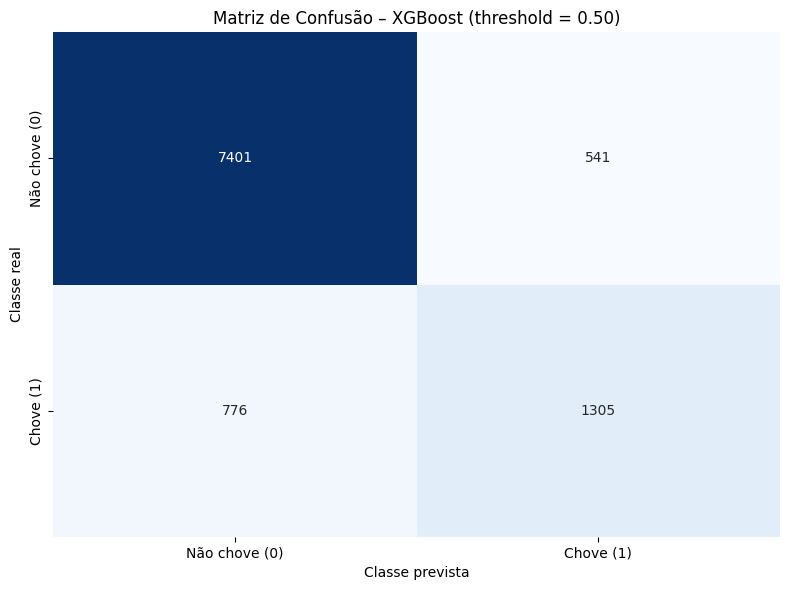

In [40]:
# Correção da sintaxe e ajuste de proporção
plt.figure(figsize=(8, 6)) 

sns.heatmap(
    cm,
    annot=True,
    fmt="d",      
    cmap="Blues",
    cbar=False,
    xticklabels=["Não chove (0)", "Chove (1)"],
    yticklabels=["Não chove (0)", "Chove (1)"]
)

plt.xlabel("Classe prevista")
plt.ylabel("Classe real")
plt.title(f"Matriz de Confusão – XGBoost (threshold = {best_thr_xgb:.2f})")

plt.tight_layout()
plt.show()

In [41]:
smote = SMOTE(
    sampling_strategy=1,
    random_state=42,
    k_neighbors=10
)


In [42]:
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1
)

xgb_smote_pipe = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", smote),
    ("model", xgb_model)
])


In [43]:
xgb_smote_pipe.fit(X_train, y_train)

y_proba_xgb_smote = xgb_smote_pipe.predict_proba(X_test)[:, 1]


In [44]:

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

import matplotlib.pyplot as plt
import seaborn as sns

In [45]:

# SCALE_POS_WEIGHT DO TREINOO


n_pos = int((y_train == 1).sum())
n_neg = int((y_train == 0).sum())

scale_pos_weight = n_neg / n_pos

print("Positivos (chuva):", n_pos)
print("Negativos (não chuva):", n_neg)
print("scale_pos_weight:", scale_pos_weight)


Positivos (chuva): 8640
Negativos (não chuva): 31496
scale_pos_weight: 3.64537037037037


In [46]:

#  XGBOOST + SMOTE

# sampling
smote = SMOTE(
    sampling_strategy=1,
    k_neighbors=6,
    random_state=42
)

xgb_model_smote = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.03,
    reg_lambda=1.0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    reg_alpha=0.1,
    tree_method='hist',
    enable_categorical=True,
    n_jobs=-1
)

xgb_smote_pipe = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("smote", smote),
    ("model", xgb_model_smote)
])

xgb_smote_pipe.fit(X_train, y_train)

y_proba_xgb_smote = xgb_smote_pipe.predict_proba(X_test)[:, 1]

print("Exemplo de probas (smote):", y_proba_xgb_smote[:10])


Exemplo de probas (smote): [0.6382699  0.5020053  0.56465244 0.04577675 0.10027633 0.00473028
 0.10770896 0.69050634 0.18409902 0.72362345]


In [47]:

# VARREDURA DE THRESHOLDS


def sweep_thresholds(y_true, y_proba, thresholds):
    """
    y_true: labels reais (0/1)
    y_proba: probabilidade da classe 1
    thresholds: lista/array de thresholds
    
    Retorna DataFrame com métricas por threshold.
    """
    results = []
    
    for thr in thresholds:
        y_pred = (y_proba >= thr).astype(int)
        
        acc = accuracy_score(y_true, y_pred)
        rec1 = recall_score(y_true, y_pred, pos_label=1)
        prec1 = precision_score(y_true, y_pred, pos_label=1)
        f11 = f1_score(y_true, y_pred, pos_label=1)
        
        cm = confusion_matrix(y_true, y_pred)
        TN, FP, FN, TP = cm.ravel()
        
        results.append({
            "threshold": float(thr),
            "accuracy": acc,
            "recall_chuva": rec1,
            "precision_chuva": prec1,
            "f1_chuva": f11,
            "false_negatives": int(FN),
            "false_positives": int(FP),
            "true_positives" : int(TP),
            "true_negatives" : int(TN)
        })
    
    return pd.DataFrame(results)


In [48]:

# XGBOOST PURO 


xgb_model_control = XGBClassifier(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.03,
    reg_lambda=1.0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    reg_alpha=0.1,
    tree_method='hist',
    enable_categorical=True,
    n_jobs=-1
)

xgb_control_pipe = ImbPipeline(steps=[
    ("preprocess", preprocessor),
    ("model", xgb_model_control)
])

xgb_control_pipe.fit(X_train, y_train)

y_proba_xgb_control = xgb_control_pipe.predict_proba(X_test)[:, 1]

print("Exemplo de probas (controle):", y_proba_xgb_control[:10])


Exemplo de probas (controle): [0.49087587 0.4043516  0.39897922 0.02505716 0.0641699  0.00936663
 0.06636461 0.57263964 0.13163783 0.6695039 ]


In [49]:

# RODAR SWEEP COMPARAÇÃO

df_thr_control = sweep_thresholds(y_test, y_proba_xgb_control, thresholds)
df_thr_smote   = sweep_thresholds(y_test, y_proba_xgb_smote, thresholds)

print("Controle XGB")
display(df_thr_control.sort_values("recall_chuva", ascending=False))

print("Experimental XGB e SMOTE")
display(df_thr_smote.sort_values("recall_chuva", ascending=False))


Controle XGB


,threshold,accuracy,recall_chuva,precision_chuva,f1_chuva,false_negatives,false_positives,true_positives,true_negatives
0,0.30,0.747980,0.894282,0.446604,0.595711,220,2306,1861,5636
1,0.35,0.776314,0.874580,0.478821,0.618837,261,1981,1820,5961
2,0.40,0.797167,0.849592,0.506881,0.634943,313,1720,1768,6222
3,0.45,0.815524,0.823162,0.536318,0.649479,368,1481,1713,6461
4,0.50,0.831587,0.798174,0.567088,0.663074,420,1268,1661,6674
5,0.55,0.843959,0.768861,0.596347,0.671704,481,1083,1600,6859
6,0.60,0.853337,0.729457,0.625979,0.673768,563,907,1518,7035
7,0.65,0.861718,0.690053,0.659623,0.674495,645,741,1436,7201
8,0.70,0.863514,0.637194,0.683858,0.659701,755,613,1326,7329


Experimental XGB e SMOTE


,threshold,accuracy,recall_chuva,precision_chuva,f1_chuva,false_negatives,false_positives,true_positives,true_negatives
0,0.30,0.714557,0.913023,0.414847,0.570485,181,2680,1900,5262
1,0.35,0.739599,0.895243,0.437838,0.588068,218,2392,1863,5550
2,0.40,0.764043,0.874580,0.463812,0.606162,261,2104,1820,5838
3,0.45,0.788087,0.854397,0.494026,0.626056,303,1821,1778,6121
4,0.50,0.806246,0.831812,0.520915,0.640637,350,1592,1731,6350
5,0.55,0.823705,0.806824,0.551577,0.655220,402,1365,1679,6577
6,0.60,0.837673,0.773667,0.582068,0.664328,471,1156,1610,6786
7,0.65,0.847750,0.735704,0.610690,0.667393,550,976,1531,6966
8,0.70,0.857228,0.689092,0.646528,0.667132,647,784,1434,7158



Classification report (XGBoost + SMOTE (sampling_strategy=1), thr=0.6):
              precision    recall  f1-score   support

           0     0.9351    0.8544    0.8930      7942
           1     0.5821    0.7737    0.6643      2081

    accuracy                         0.8377     10023
   macro avg     0.7586    0.8141    0.7786     10023
weighted avg     0.8618    0.8377    0.8455     10023

Matriz de confusão:
[[6786 1156]
 [ 471 1610]]


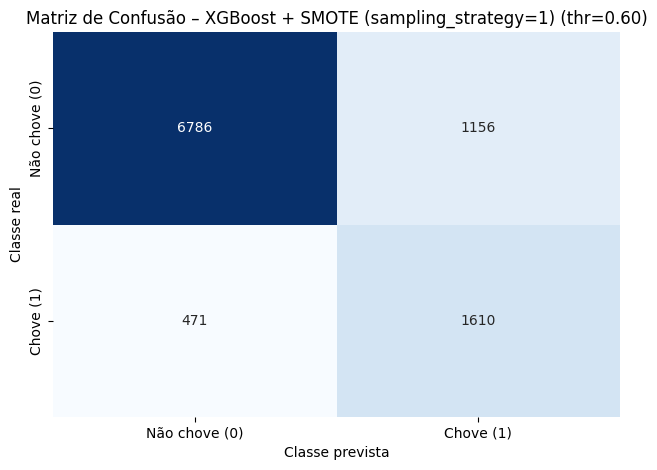

In [50]:

# MATRIZ 

y_proba_final = y_proba_xgb_smote
modelo_nome = "XGBoost + SMOTE (sampling_strategy=1)"

# threshold
best_thr = 0.60

y_pred_final = (y_proba_final >= best_thr).astype(int)

print(f"\nClassification report ({modelo_nome}, thr={best_thr}):")
print(classification_report(y_test, y_pred_final, digits=4))

cm = confusion_matrix(y_test, y_pred_final)
print("Matriz de confusão:")
print(cm)

# Plot
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Não chove (0)", "Chove (1)"],
    yticklabels=["Não chove (0)", "Chove (1)"]
)

plt.xlabel("Classe prevista")
plt.ylabel("Classe real")
plt.title(f"Matriz de Confusão – {modelo_nome} (thr={best_thr:.2f})")

plt.tight_layout()
plt.show()


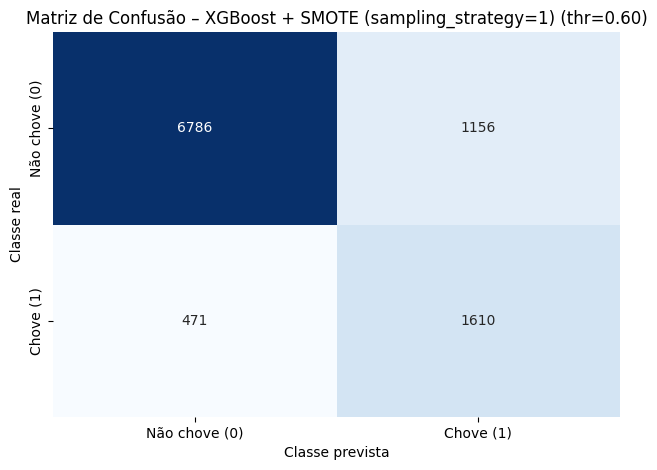

In [51]:

# MATRIZ NORMALIZADA


cm_norm = cm / cm.sum(axis=1, keepdims=True)

"""
plt.figure(figsize=(7,)
sns.heatmap(
    cm_norm,
    annot=True,
    fmt=".2%",
    cmap="Blues",
    cbar=False,
    xticklabels=["Não chove (0)", "Chove (1)"],
    yticklabels=["Não chove (0)", "Chove (1)"]
)
plt.xlabel("Classe prevista")
plt.ylabel("Classe real")
plt.title(f"Matriz Normalizada – {modelo_nome} (thr={best_thr})")
plt.tight_layout()
plt.show()
"""

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=False,
    xticklabels=["Não chove (0)", "Chove (1)"],
    yticklabels=["Não chove (0)", "Chove (1)"]
)

plt.xlabel("Classe prevista")
plt.ylabel("Classe real")
plt.title(f"Matriz de Confusão – {modelo_nome} (thr={best_thr:.2f})")

plt.tight_layout()
plt.show()


In [52]:
# X_all = tudo que o modelo precisa ver, sem o target
X_all = df.drop(columns=[COL_TARGET]).copy()

# Se a sua coluna de data NÃO é feature (normalmente não é), remova também:
X_all = X_all.drop(columns=[COL_DATA], errors="ignore")


NameError: name 'COL_TARGET' is not defined


# SCRIPT COMPLETO: GERAR E EXPORTAR TABELAS PARA POWER BI
# (com criação automática da pasta de saída)
#
# PRÉ-REQUISITOS (precisam existir no seu notebook antes de rodar):
# - df                  -> DataFrame original
# - xgb_smote_pipe      -> pipeline treinado (ImbPipeline com preprocess + SMOTE + XGBClassifier)
# - X_test, y_test      -> conjunto de teste


import os
import numpy as np
import pandas as pd

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)



# 0.1) Pasta de saída
BASE_DIR = r"C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados"
#r'C:\Users\JacyzinGuilherme(Bip\mentoria-bip\dados_editados\


# 0.2) Identidade do modelo (para versionamento dos arquivos)
MODEL_TAG = "xgb_smote_0p4_thr055_v1"

# 0.3) Threshold final escolhido
BEST_THR = 0.60

# 0.4) Nomes das colunas no seu dataset (AJUSTE SE PRECISAR)
COL_DATA = "data"
COL_LOCALIDADE = "localidade"
COL_TARGET = "chove_amanha_vtr"

# 0.5) Grade de thresholds para auditoria (AJUSTE SE QUISER)
thresholds = np.arange(0.30, 0.71, 0.05)

# 0.6) Metadados
VERSAO_DATASET = "australia_clima_v9"
MODELO_NOME = "xgb_smote_0p4"


# GARANTIR QUE A PASTA EXISTE (CORREÇÃO DO SEU ERRO)


# Cria a pasta se não existir (e não dá erro se já existir)
os.makedirs(BASE_DIR, exist_ok=True)

print("Pasta de saída confirmada:")
print(BASE_DIR)
print("Existe mesmo?", os.path.isdir(BASE_DIR))



# VALIDAÇÕES RÁPIDAS


# 2.1) Checar colunas essenciais no df
colunas_essenciais = {COL_DATA, COL_LOCALIDADE, COL_TARGET}
faltando_df = colunas_essenciais - set(df.columns)
if faltando_df:
    raise ValueError(
        f"Seu df não tem as colunas essenciais: {faltando_df}. "
        f"Ajuste COL_DATA/COL_LOCALIDADE/COL_TARGET para o nome correto."
    )

# 2.2) Checar se o pipeline existe
if "xgb_smote_pipe" not in globals():
    raise ValueError("A variável xgb_smote_pipe não existe. Treine o pipeline antes de exportar.")

# 2.3) Checar se X_test e y_test existem
if "X_test" not in globals() or "y_test" not in globals():
    raise ValueError("X_test e/ou y_test não existem. Você precisa do split de teste para auditoria e tabelas.")



# FUNÇÃO: FAIXA DE RISCO (PARA BI)


def faixa_risco(prob):
    """
    Converte probabilidade (0..1) em categoria textual
    para facilitar leitura no Power BI.
    """
    if prob < 0.30:
        return "Baixo"
    elif prob < BEST_THR:
        return "Médio"
    elif prob < 0.70:
        return "Alto"
    else:
        return "Crítico"



# FUNÇÃO: VARREDURA DE THRESHOLDS (AUDITORIA)


def sweep_thresholds(y_true, y_proba, thresholds_array):
    """
    Para cada threshold:
    - converte probabilidade em classe (0/1)
    - calcula métricas
    - extrai TN/FP/FN/TP

    Retorna DataFrame com resultados por threshold.
    """
    rows = []

    for thr in thresholds_array:
        y_pred = (y_proba >= thr).astype(int)

        acc = accuracy_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred, pos_label=1)
        prec = precision_score(y_true, y_pred, pos_label=1)
        f1 = f1_score(y_true, y_pred, pos_label=1)

        cm = confusion_matrix(y_true, y_pred)
        TN, FP, FN, TP = cm.ravel()

        rows.append({
            "threshold": float(thr),
            "accuracy": float(acc),
            "recall_chuva": float(rec),
            "precision_chuva": float(prec),
            "f1_chuva": float(f1),
            "TN": int(TN),
            "FP": int(FP),
            "FN": int(FN),
            "TP": int(TP),
        })

    return pd.DataFrame(rows)



# MONTAR X_all CORRETAMENTE (evita 'localidade' missing)


# X_all = tudo menos o target (e removemos a data se ela não for feature)
X_all = df.drop(columns=[COL_TARGET]).copy()
X_all = X_all.drop(columns=[COL_DATA], errors="ignore")

if COL_LOCALIDADE not in X_all.columns:
    raise ValueError(
        f"A coluna '{COL_LOCALIDADE}' não está em X_all. "
        f"Seu pipeline provavelmente espera essa coluna. "
        f"Verifique se COL_LOCALIDADE está correto e se você não removeu a coluna por engano."
    )

print("X_all pronto para inferência.")
print("Total de colunas:", len(X_all.columns))
print("Exemplo de colunas (primeiras 10):", list(X_all.columns)[:10])



# GERAR PREVISÕES PARA O DATASET INTEIRO (FULL)


proba_all = xgb_smote_pipe.predict_proba(X_all)[:, 1]

df_full = pd.DataFrame({
    COL_DATA: pd.to_datetime(df[COL_DATA]).dt.date,
    COL_LOCALIDADE: df[COL_LOCALIDADE],
    "y_real": df[COL_TARGET],
    "prob_chuva": proba_all,
    "pred_chuva": (proba_all >= BEST_THR).astype(int),
    "threshold_usado": BEST_THR,
    "modelo": MODELO_NOME,
    "model_tag": MODEL_TAG,
    "versao_dataset": VERSAO_DATASET
})

df_full["faixa_risco"] = df_full["prob_chuva"].apply(faixa_risco)



#  MARCAR SPLIT (train/test) E GERAR TABELA DO TESTE


df_full["split"] = "train"
df_full.loc[X_test.index, "split"] = "test"

df_test = df_full.loc[X_test.index].copy()

df_test["flag_TP"] = ((df_test["y_real"] == 1) & (df_test["pred_chuva"] == 1)).astype(int)
df_test["flag_TN"] = ((df_test["y_real"] == 0) & (df_test["pred_chuva"] == 0)).astype(int)
df_test["flag_FP"] = ((df_test["y_real"] == 0) & (df_test["pred_chuva"] == 1)).astype(int)
df_test["flag_FN"] = ((df_test["y_real"] == 1) & (df_test["pred_chuva"] == 0)).astype(int)



#  TABELA DE THRESHOLDS (AUDITORIA)


# Probabilidades no teste (consistência)
y_proba_test = xgb_smote_pipe.predict_proba(X_test)[:, 1]

df_thresholds = sweep_thresholds(y_test, y_proba_test, thresholds)
df_thresholds["modelo"] = MODELO_NOME
df_thresholds["model_tag"] = MODEL_TAG
df_thresholds["versao_dataset"] = VERSAO_DATASET



#  RESUMO FINAL DA MATRIZ (threshold escolhido)


y_pred_best = (y_proba_test >= BEST_THR).astype(int)

cm_best = confusion_matrix(y_test, y_pred_best)
TN, FP, FN, TP = cm_best.ravel()

acc_best = accuracy_score(y_test, y_pred_best)
rec_best = recall_score(y_test, y_pred_best, pos_label=1)
prec_best = precision_score(y_test, y_pred_best, pos_label=1)
f1_best = f1_score(y_test, y_pred_best, pos_label=1)

df_confusao_resumo = pd.DataFrame([{
    "threshold": float(BEST_THR),
    "TN": int(TN),
    "FP": int(FP),
    "FN": int(FN),
    "TP": int(TP),
    "accuracy": float(acc_best),
    "recall_chuva": float(rec_best),
    "precision_chuva": float(prec_best),
    "f1_chuva": float(f1_best),
    "modelo": MODELO_NOME,
    "model_tag": MODEL_TAG,
    "versao_dataset": VERSAO_DATASET
}])




# salvando

path_full = fr"{BASE_DIR}\ml_previsoes_full_{MODEL_TAG}.csv"
path_test = fr"{BASE_DIR}\ml_previsoes_test_{MODEL_TAG}.csv"
path_thr  = fr"{BASE_DIR}\ml_thresholds_{MODEL_TAG}.csv"
path_cm   = fr"{BASE_DIR}\ml_confusao_resumo_{MODEL_TAG}.csv"

df_full.to_csv(path_full, sep=";", index=False, encoding="utf-8-sig")
df_test.to_csv(path_test, sep=";", index=False, encoding="utf-8-sig")
df_thresholds.to_csv(path_thr, sep=";", index=False, encoding="utf-8-sig")
df_confusao_resumo.to_csv(path_cm, sep=";", index=False, encoding="utf-8-sig")

print("\nArquivos gerados com sucesso:")
print(path_full)
print(path_test)
print(path_thr)
print(path_cm)


import numpy as np
import pandas as pd
import xgboost as xgb
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# identificando colunas dinamicamente para evitar erros de tipo
numeric_features = X_train.select_dtypes(include=["number"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ("num", ImbPipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), numeric_features),
    ("cat", ImbPipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_features)
])


# ADASYN
adasyn_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('resampler', ADASYN(sampling_strategy=0.4, random_state=42, n_neighbors=5)),
    ('classifier', xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42))
])

# treinamento
adasyn_pipeline.fit(X_train, y_train)


y_proba = adasyn_pipeline.predict_proba(X_test)[:, 1]
thresholds = np.arange(0.3, 0.71, 0.05)
resultados = []

for thr in thresholds:
    y_pred = (y_proba >= thr).astype(int)
    
    # métricas Base
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    # matriz de Confusão
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    resultados.append({
        "Threshold": f"{thr:.2f}",
        "Accuracy": f"{acc:.4f}",
        "Recall": f"{rec:.4f}",
        "Precision": f"{prec:.4f}",
        "F1-Score": f"{f1:.4f}",
        "TN": tn, "FP": fp, "FN": fn, "TP": tp
    })


df_audit = pd.DataFrame(resultados)
print(df_audit.to_string(index=False))